# Project: Investigate a Dataset - [noshowappointments-kagglev2-may-2016]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> A person makes a doctor appointment, receives all the instructions and no-show. Who to blame?

> ## Data Dictionary ->

> ##### PatientId-AppointmentID-Gender-ScheduledDay-AppointmentDay-Age-Neighbourhood-Scholarship-Hipertension-Diabetes-Alcoholism-Handcap-SMS_received-No-show

> ## Question suggestion to answer it ?

> #### What a relation between Alcoholism and No-show??

> #### What a relation between Scholarship and No-show??

> #### What a relation between Diabetes and No-show??

> #### What a relation between Hipertension and No-show??

> #### Is SMS_received exciting factor to show or no show??

> #### Is Gender exciting factor to show or no show??

> #### Is Age exciting factor to show or no show??

> #### What a percentage of patients showed up by Age?

In [1]:
#import library used
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

In [2]:
#load data
df = pd.read_csv("noshowappointments-kagglev2-may-2016.csv")

In [3]:
#load head data frame
df.head(2)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [5]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [6]:
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

In [7]:
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

### Data Cleaning

In [8]:
# check missing valus
df.isna().sum()
#we don't have missing values

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [9]:
#check duplicated values 
sum(df.duplicated())
# no duplicated values 

0

In [10]:
df = df.drop(['PatientId', 'AppointmentID'], axis=1)

In [11]:
df.head(2)

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No


In [12]:
#we have a not logical value in age -1 we will remove it  
df=df[df.Age>0]

In [13]:
df.describe()

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,106987.000000,106987.000000,106987.000000,106987.000000,106987.000000,106987.000000,106987.000000
mean,38.316085,0.101031,0.203772,0.074243,0.031406,0.022975,0.323264
std,22.466214,0.301371,0.402804,0.262167,0.174412,0.164115,0.467725
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,38.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,56.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [14]:
#count -Is number of female more then male or not ??
df['Gender'].value_counts()

F    70118
M    36869
Name: Gender, dtype: int64

In [15]:
df['No-show'].value_counts()

No     85307
Yes    21680
Name: No-show, dtype: int64

In [16]:
#convert No Show to nomercal valus
df['No-show'].replace(['No','Yes'],["Yes","No"],inplace=True)

In [17]:
#and rename a colume to Show 
df.rename(columns={'No-show':'Show'},inplace=True)

In [18]:
# how many show in appointments
df['Show'].value_counts()

Yes    85307
No     21680
Name: Show, dtype: int64

In [19]:
#ScheduledDay    and  AppointmentDay  as string we will convert it to datatime 
df["ScheduledDay"]=pd.to_datetime(df["ScheduledDay"])
df["AppointmentDay"]=pd.to_datetime(df["AppointmentDay"])

In [20]:
df.head(2)

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Show
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,Yes
1,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,Yes


In [21]:
df.describe()

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,106987.000000,106987.000000,106987.000000,106987.000000,106987.000000,106987.000000,106987.000000
mean,38.316085,0.101031,0.203772,0.074243,0.031406,0.022975,0.323264
std,22.466214,0.301371,0.402804,0.262167,0.174412,0.164115,0.467725
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,38.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,56.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


## Exploratory Data Analysis

## What a relation between Alcoholism and No-show??

In [22]:
#count people Alcoholism
df.Alcoholism.value_counts()

0    103627
1      3360
Name: Alcoholism, dtype: int64

Text(0.5, 1.0, 'Count peaple Alcoholism ')

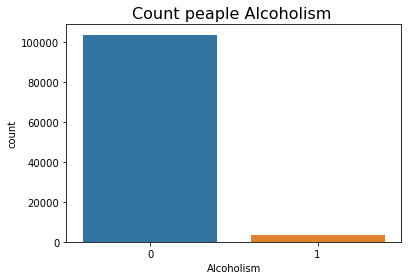

In [23]:
#plot
ax = sns.countplot(x=df.Alcoholism,data=df)
ax.set_title("Count peaple Alcoholism ", size='16')

Text(0.5, 1.0, 'Count people Alcoholism show or not ')

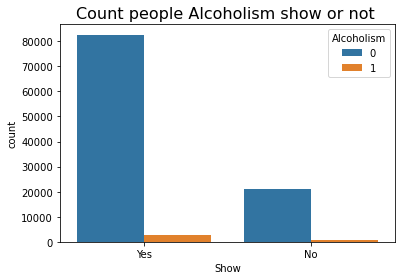

In [24]:
#Plot
ax=sns.countplot(x=df.Show,hue=df.Alcoholism,data=df)
ax.set_title("Count people Alcoholism show or not ",size='16')

#### This is some people Alcoholism but Show Yes but this no exciting factor

## What a relation between Scholarship and No-show??

In [25]:
#count people Scholarship
df.Scholarship.value_counts()

0    96178
1    10809
Name: Scholarship, dtype: int64

Text(0.5, 1.0, 'Count peaple Scholarship ')

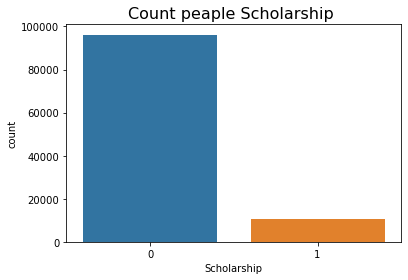

In [26]:
#plot
ax = sns.countplot(x=df.Scholarship,data=df)
ax.set_title("Count peaple Scholarship ", size='16')

Text(0.5, 1.0, 'Count people having Scholarship show or not ')

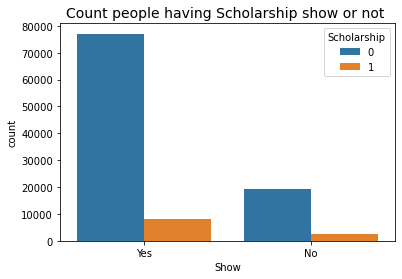

In [27]:
#Plot
ax=sns.countplot(x=df.Show,hue=df.Scholarship,data=df)
ax.set_title("Count people having Scholarship show or not ",size='14')

#### Some people have a scholarship he attend like Alchoholism

## Is SMS_received exciting factor to show or no show??

In [28]:
df.SMS_received.value_counts()

0    72402
1    34585
Name: SMS_received, dtype: int64

Text(0.5, 1.0, 'Count peaple received SMS ')

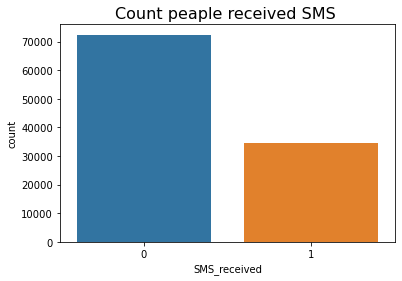

In [29]:
ax = sns.countplot(x=df.SMS_received,data=df)
ax.set_title("Count peaple received SMS ", size='16')

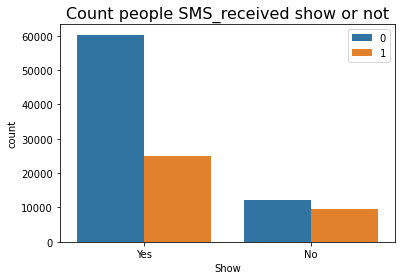

In [30]:
ax = sns.countplot(x=df.Show, hue=df.SMS_received,data=df)
ax.set_title("Count people SMS_received show or not", size='16')
ax.legend()

#### some people don't recceive a messange NO show so Message effective factor to Show or NO Show but not only one

## Is Gender exciting factor to show or no show??

In [31]:
df.Gender.value_counts()

F    70118
M    36869
Name: Gender, dtype: int64

Text(0.5, 1.0, 'countable Gender with male and female')

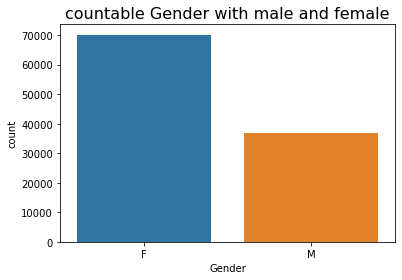

In [32]:
ax=sns.countplot(x=df.Gender,data=df)
ax.set_title("countable Gender with male and female",size='16')

([<matplotlib.patches.Wedge at 0x239fe6e7df0>,
 [Text(-0.5159075686922991, 0.9715139631348594, 'F'),
  Text(0.5628083559839979, -1.0598333616350213, 'M')],
 [Text(-0.2814041283776177, 0.5299167071644687, '65.5%'),
  Text(0.3283048743239988, -0.618236127620429, '34.5%')])

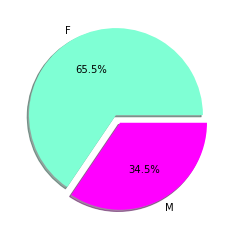

In [33]:
plt.pie(df['Gender'].value_counts(), labels = ['F', 'M'],colors=['Aquamarine', 'magenta'], 
        startangle=0, shadow = True, explode = (0, 0.1),
        radius = 1.0, autopct = '%1.1f%%')

Text(0.5, 1.0, 'relation between Gender and Show')

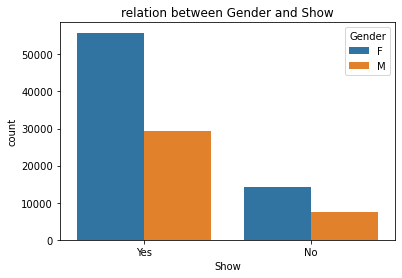

In [34]:
ax=sns.countplot(x=df.Show,hue=df.Gender,data=df)
ax.set_title("relation between Gender and Show")

#### In this data number of female double male so some result will effective with that like this result but we see Gender not effective factor in this data 

## What a relation between Hipertension and No-show??

In [35]:
df.Hipertension.value_counts()

0    85186
1    21801
Name: Hipertension, dtype: int64

([<matplotlib.patches.Wedge at 0x23981036550>,
 [Text(-0.8821936746610862, 0.6570649285937957, '0'),
  Text(0.9623930996302758, -0.7167981039205046, '1')],
 [Text(-0.4811965498151379, 0.3583990519602522, '79.6%'),
  Text(0.5613959747843275, -0.418132227286961, '20.4%')])

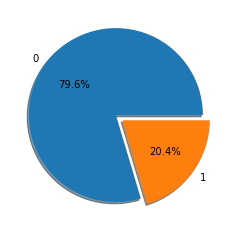

In [36]:
plt.pie(df['Hipertension'].value_counts(), labels = [0,1], 
        startangle=0, shadow = True, explode = (0, 0.1),
        radius = 1.0, autopct = '%1.1f%%')

Text(0.5, 1.0, 'relation between Hipertension and Show')

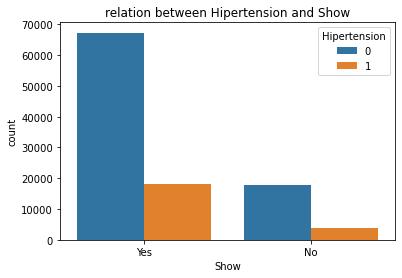

In [37]:
ax=sns.countplot(x=df.Show,hue=df.Hipertension,data=df)
ax.set_title("relation between Hipertension and Show")

#### People have Hipertension some of them Show so this not a factor effective in my Opinion

## What a relation between Diabetes and No-show??

In [38]:
df.Diabetes.value_counts()

0    99044
1     7943
Name: Diabetes, dtype: int64

Text(0.5, 1.0, 'countable Diabetes')

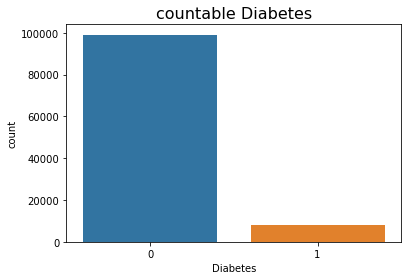

In [39]:
ax=sns.countplot(x=df.Diabetes,data=df)
ax.set_title("countable Diabetes",size='16')

Text(0.5, 1.0, 'relation between Diabetes and Show')

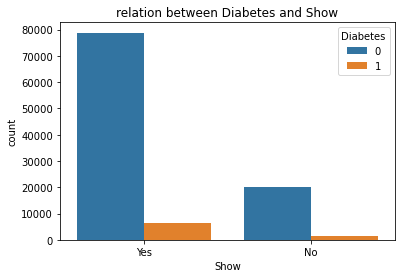

In [40]:
ax=sns.countplot(x=df.Show,hue=df.Diabetes,data=df)
ax.set_title("relation between Diabetes and Show")

#### In graph It shows that we cannot determine whether it is an influential factor or not

## Is Age exciting factor to show or no show??

Text(0.5, 1.0, 'Age histogram')

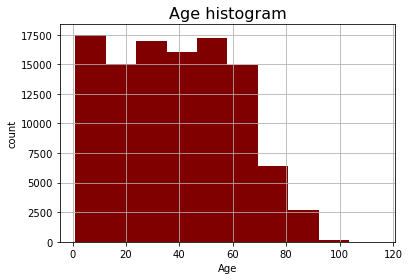

In [41]:
df.Age.hist(color="Maroon")
plt.xlabel('Age')
plt.ylabel('count')
plt.title('Age histogram', size='16')

Text(0.5, 1.0, 'Relation between Age and Show')

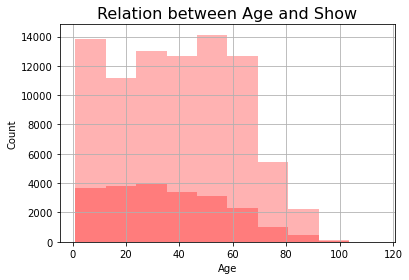

In [42]:
df.groupby(df.Show).Age.hist(facecolor='r', alpha=0.3)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Relation between Age and Show', size='16')

### Age is a effective factor in this data somewhat so such that increasing age he not show 

In [43]:
df.Show.unique()

array(['Yes', 'No'], dtype=object)

## What a percentage of patients showed up by Age?

Text(0.5, 1.0, 'percentage of patients showed up by age')

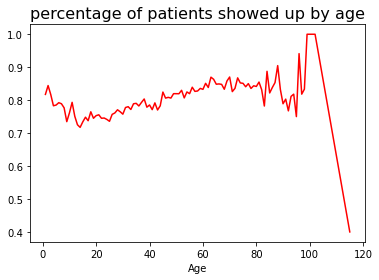

In [44]:
Age_ratio = df[df.Show == 'Yes'].groupby(['Age']).size()/df.groupby(['Age']).size()
Age_ratio.plot(color=["red"])
plt.title('percentage of patients showed up by age', size='16')

## Conclusions
##### This Dataset is interesting and has a Lot to investigate, Before us there is a close relationship between the people to whom a message has been sent or not, which affects their presence or not in a certain percentage. There is also a relationship in gender, but it is a false relationship somewhat because the data is not equal in the number of men and women. Also, age is not a direct factor in non-attendance, but the graph shows that the higher the age, the lower the attendance rate significantly